<a href="https://colab.research.google.com/github/vcautela/SeriesTemporais_exercicio/blob/main/SeriesTemporais_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy


In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.4 MB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import scipy as scipy
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
df = pd.read_excel('/content/temperature.xlsx', index_col='Date', parse_dates=True)
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-02-01,17.9
1981-03-01,18.8
1981-04-01,14.6
1981-05-01,15.8


In [30]:
df.tail()

,Daily minimum temperatures
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3647 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [8]:
df.sort_index(inplace=True)

<Figure size 2000x1000 with 0 Axes>

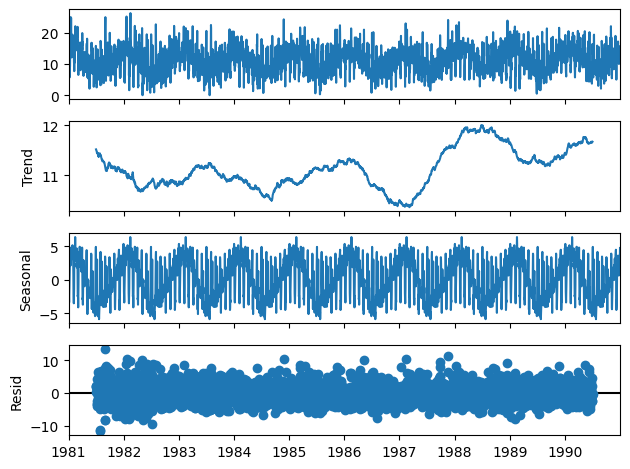

In [9]:
resultado = seasonal_decompose(df, model='add', period=365)

fig = plt.figure(figsize=(20,10))
fig= resultado.plot()

## teste de estacionarieade

In [10]:
result = adfuller(df['Daily minimum temperatures'].dropna())
print(f'teste ADF: {result[0]}')
print(f'p-value: {result[1]}')

teste ADF: -3.331541412968857
p-value: 0.01352611219545271


In [11]:
fit_arima = auto_arima(df, d=1, start_p=1, max_p=3, max_q=3,
                       seasonal=True,
                       m=6,
                       D=1,
                       start_P=1,
                       start_Q=1,
                       max_P=2,
                       max_Q=2,
                       information_criterion='aic',
                       trace=True,
                       error_action='ignore',
                       stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[6]             : AIC=inf, Time=18.02 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22211.573, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=20978.709, Time=0.81 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.88 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22068.931, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=20482.431, Time=1.22 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=21.30 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=13.46 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=20662.364, Time=1.72 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=20418.687, Time=2.60 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=20927.151, Time=1.93 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=29.82 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=11.13 sec
 ARIMA(3,1,0)(2,1,0)[6]             : AIC=20352.684, Time=2.56 sec
 ARIMA(3,1,0)(1,1,0)[6]             : AIC=20872.99

a ordem do ARIMA é (3, 1, 0), indicando 3 termos autoregressivos, 1 diferença sazonal e 0 termos de média móvel.

In [12]:
# criando o modelo
model = SARIMAX(df, order=(3,1,0))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMAX: É uma classe do Statsmodels usada para ajustar modelos ARIMA (AutoRegressive Integrated Moving Average) com componentes sazonais (X). No caso do modelo que você está criando, a ordem do ARIMA é (3, 1, 0), indicando 3 termos autoregressivos, 1 diferença sazonal e 0 termos de média móvel.

In [42]:
# Ajustando o modelo aos dados e obtendo os resultados
predicoes = resultado_sarimax.get_prediction(start = -60)
# Obtendo a média das previsões
predicao_media = predicoes.predicted_mean
print(predicao_media)

Date
1990-11-02    19.837603
1990-11-03    16.245027
1990-11-04    15.405730
1990-11-05    18.376023
1990-11-06    12.366607
1990-11-07     9.122254
1990-11-08     7.468361
1990-11-09     6.832345
1990-11-10    12.263500
1990-11-11    11.081124
1990-11-12     9.015270
1990-11-13    11.264397
1990-11-14    12.973993
1990-11-15    13.599023
1990-11-16    13.141069
1990-11-17    12.705261
1990-11-18    10.142237
1990-11-19    10.859485
1990-11-20    10.230916
1990-11-21     8.671762
1990-11-22    13.425336
1990-11-23    12.055246
1990-11-24    10.661627
1990-11-25    11.558468
1990-11-26    12.551159
1990-11-27    12.529178
1990-11-28     9.777880
1990-11-29    13.702982
1990-11-30    14.182986
1990-12-01    12.564203
1990-12-02    17.513195
1990-12-03    15.321453
1990-12-04    12.865502
1990-12-05    16.135478
1990-12-06    13.104071
1990-12-07     9.007045
1990-12-08     7.039034
1990-12-09     8.491322
1990-12-10    11.097794
1990-12-11     9.837524
1990-12-12    11.829050
1990-12-13 

**predicoes.predicted_mean**: Este código extrai a média das previsões feitas pelo modelo. Cada previsão pode ser associada a um valor médio, que representa a estimativa central da distribuição prevista.

In [16]:
intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

In [40]:
intervalo_confianca.head()

,lower Daily minimum temperatures,upper Daily minimum temperatures
Date,,
1990-11-02,13.215902,26.459304
1990-11-03,9.623327,22.866728
1990-11-04,8.784029,22.027431
1990-11-05,11.754322,24.997724
1990-11-06,5.744906,18.988308


In [37]:
predicao_media.index

DatetimeIndex(['1990-11-02', '1990-11-03', '1990-11-04', '1990-11-05',
               '1990-11-06', '1990-11-07', '1990-11-08', '1990-11-09',
               '1990-11-10', '1990-11-11', '1990-11-12', '1990-11-13',
               '1990-11-14', '1990-11-15', '1990-11-16', '1990-11-17',
               '1990-11-18', '1990-11-19', '1990-11-20', '1990-11-21',
               '1990-11-22', '1990-11-23', '1990-11-24', '1990-11-25',
               '1990-11-26', '1990-11-27', '1990-11-28', '1990-11-29',
               '1990-11-30', '1990-12-01', '1990-12-02', '1990-12-03',
               '1990-12-04', '1990-12-05', '1990-12-06', '1990-12-07',
               '1990-12-08', '1990-12-09', '1990-12-10', '1990-12-11',
               '1990-12-12', '1990-12-13', '1990-12-14', '1990-12-15',
               '1990-12-16', '1990-12-17', '1990-12-18', '1990-12-19',
               '1990-12-20', '1990-12-21', '1990-12-22', '1990-12-23',
               '1990-12-24', '1990-12-25', '1990-12-26', '1990-12-27',
      

In [45]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

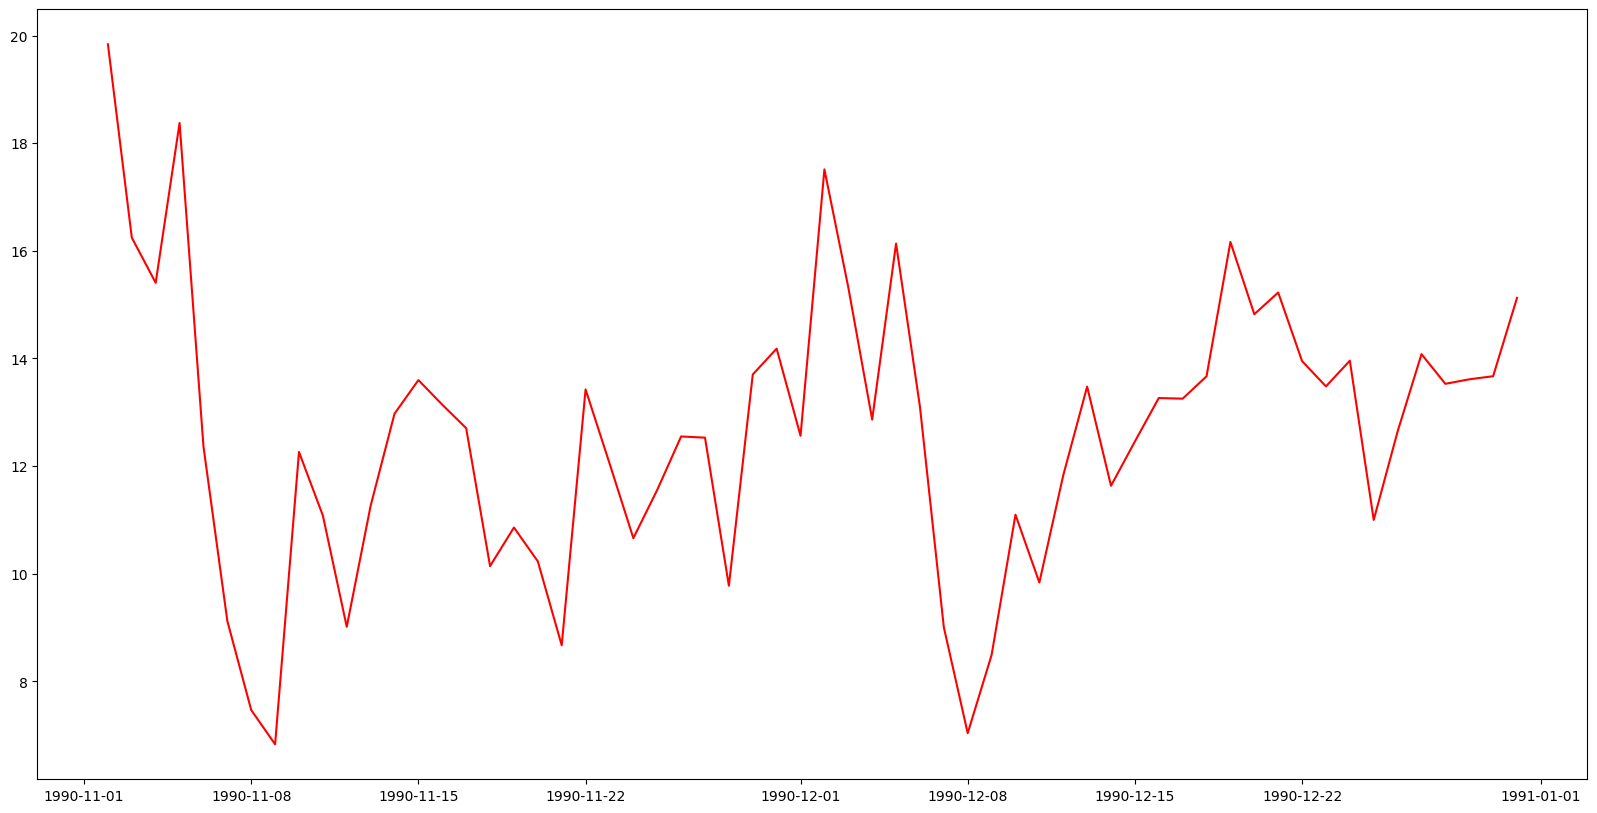

In [50]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicao_media.values, color='red', label='prediction')

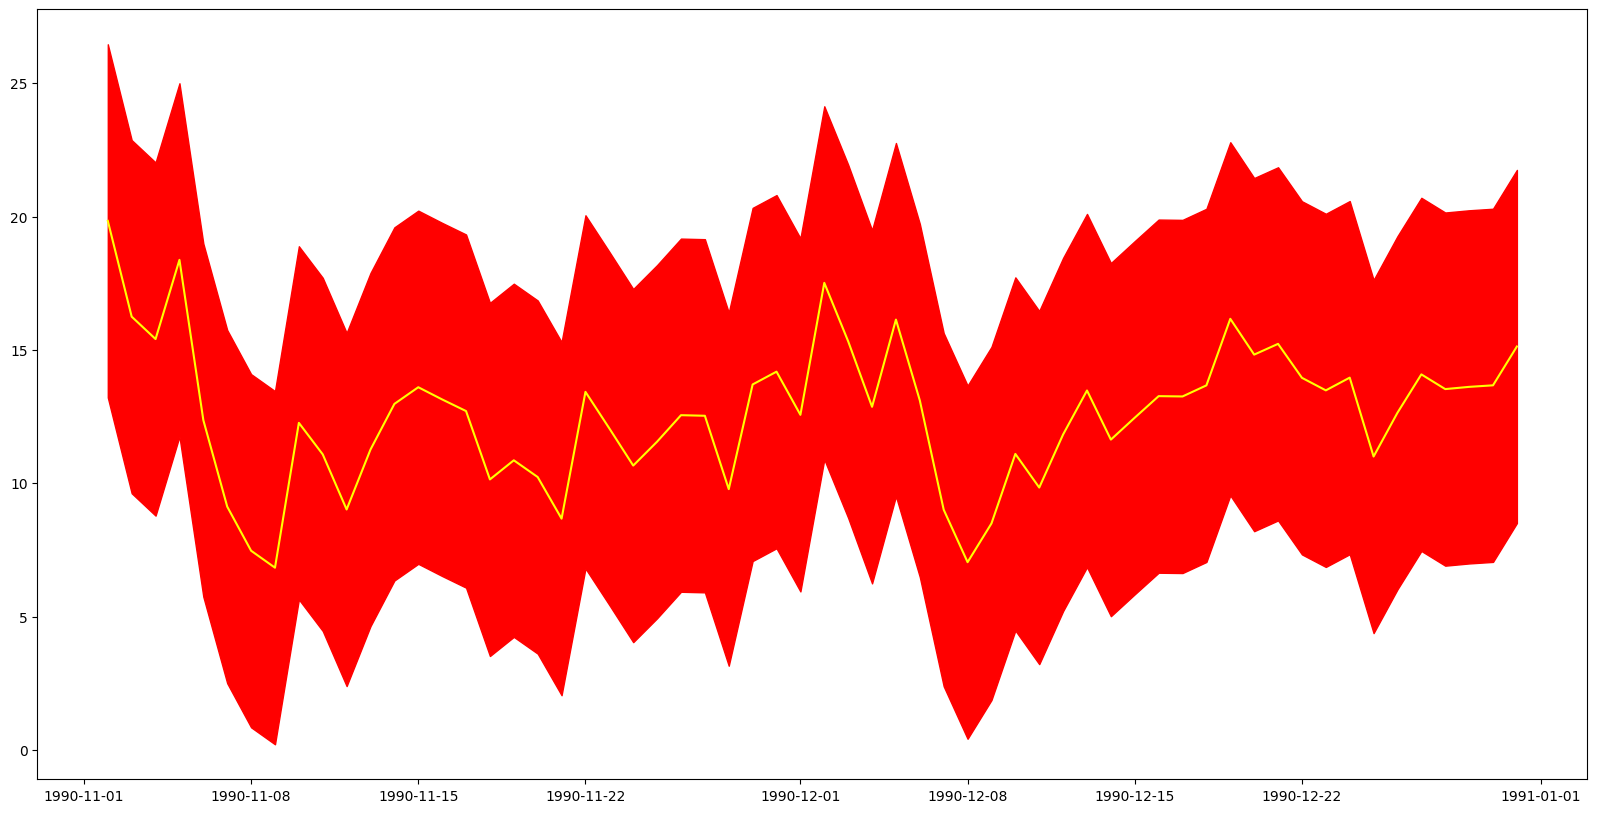

In [26]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicao_media.values, color='yellow', label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')

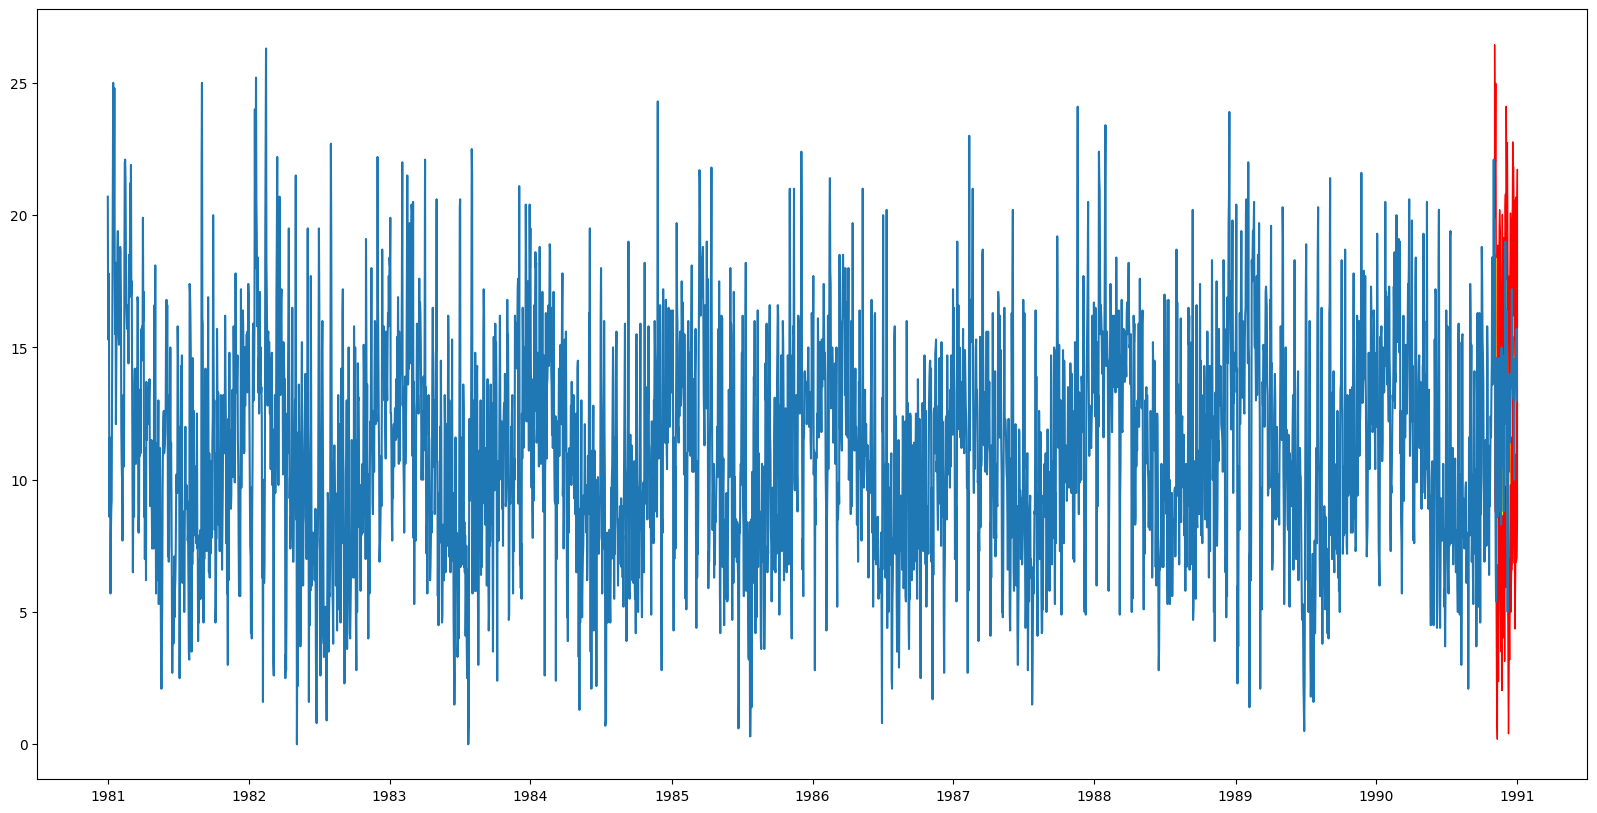

In [54]:
plt.figure(figsize=(20,10))
plt.plot(datas_previsao, predicao_media.values, color='yellow', label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')

In [48]:
print('MAE', mean_absolute_error(df[-60:].values, predicao_media))
print('MSE', mean_squared_error(df[-60:].values, predicao_media))
print('RMSE', np.sqrt(mean_squared_error(df[-60:].values, predicao_media)))

MAE 2.3475601095306216
MSE 9.07489916397673
RMSE 3.012457329818421


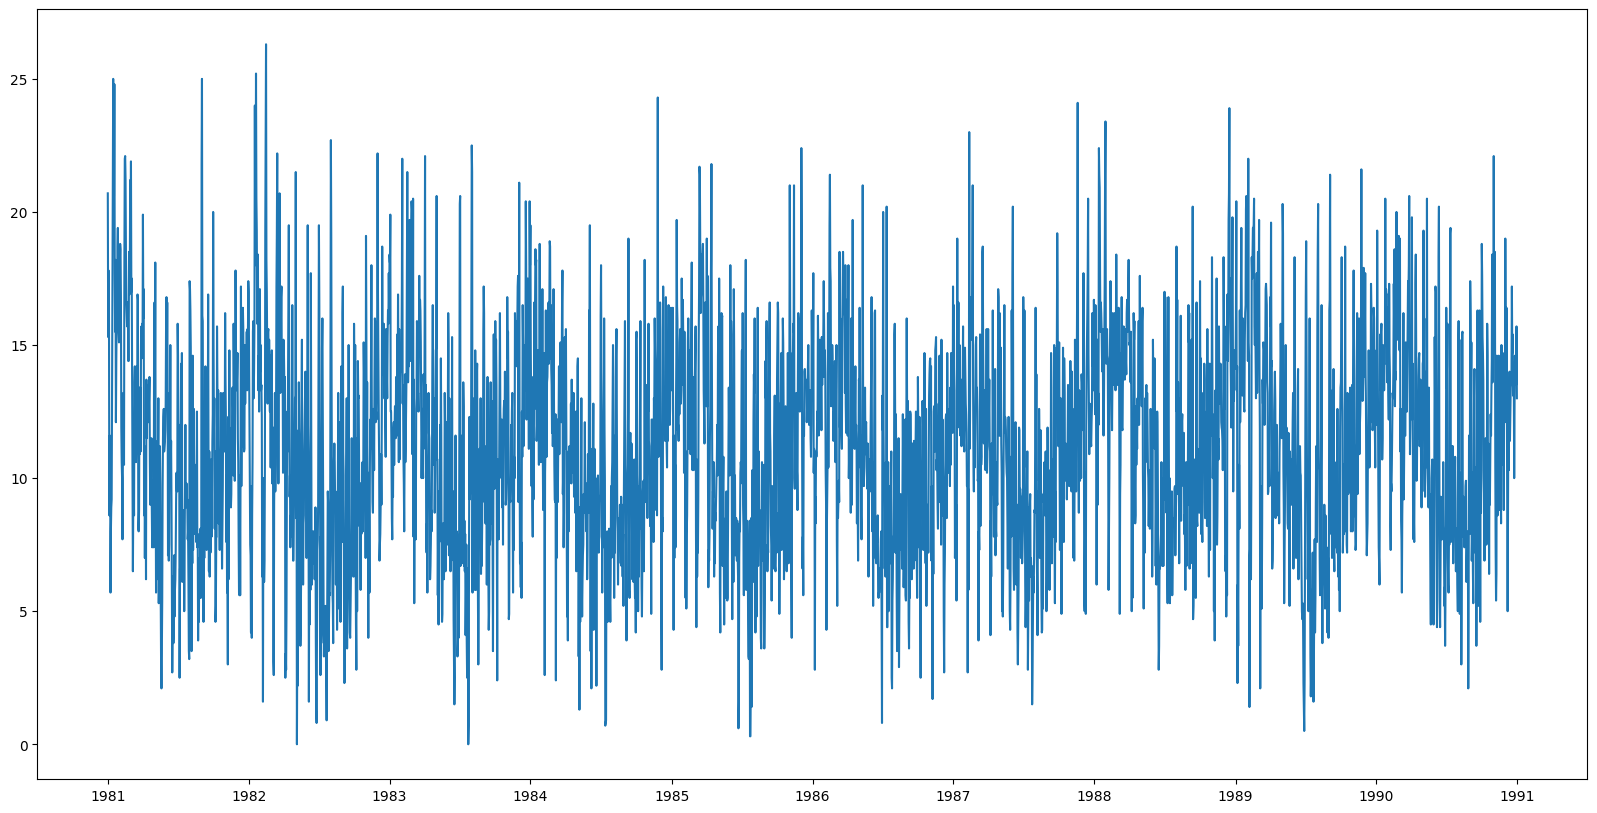

In [52]:
plt.figure(figsize=(20,10))
plt.plot(datas, df.values, label='real')